In [6]:
import sys
import numpy as np
import glob,os
import plotScan
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import OrderedDict
from matplotlib.colors import LogNorm
from scipy.interpolate import spline

In [7]:
#Read random scan points
#Define the variables to be read here:
slhaFolder = glob.glob('../data/IDM/IDM_smallDeltam_slha_xsecs/*slha')
smodelsFolder = [os.path.join('../data/IDM/smodelsOutput_IDM_smallDeltam_LargeGB/',os.path.basename(f)+'.py') for f in slhaFolder]
parsExpr = ["blocks['MASS'][37]", #0
            "decays[37].totalwidth", #1
            "1.968e-16/(max(1e-20,decays[37].totalwidth))", #2
           "np.log10(1.968e-16/(max(1e-20,decays[37].totalwidth)))", #3
            "blocks['MASS'][35]", #4
            "xsections[(2212,2212,-37,37)].get_xsecs(sqrts=13000.)[0].value", #5
            "xsections[(2212,2212,-37,37)].get_xsecs(sqrts=8000.)[0].value", #6
            "blocks['MASS'][36]", #7
           ]
points,slhaFiles = plotScan.getSLHAPoints(parsExpr,slhaFolder)

parsExpr = "ExptRes"
smodelsPoints,smodelsFiles = plotScan.getSModelSPoints(parsExpr,smodelsFolder)

In [8]:
points = points[smodelsPoints != None]
smodelsPoints = smodelsPoints[smodelsPoints != None]

In [9]:
#Further point processing:
r8HSCP = [0.]*len(smodelsPoints)
r8MET = [0.]*len(smodelsPoints)
r13HSCP = [0.]*len(smodelsPoints)
r13MET = [0.]*len(smodelsPoints)
for ipt,expList in enumerate(smodelsPoints):
    for exp in expList:
        if not exp['upper limit (fb)']:
            continue
            
        r = exp['theory prediction (fb)']/exp['upper limit (fb)']
        if exp['AnalysisSqrts (TeV)'] == 8:
            if 'exo' in exp['AnalysisID'].lower():
                r8HSCP[ipt] = max(r8HSCP[ipt],r)
            else:
                r8MET[ipt] = max(r8MET[ipt],r)
        elif exp['AnalysisSqrts (TeV)'] == 13:
            if 'exo' in exp['AnalysisID'].lower():
                r13HSCP[ipt] = max(r13HSCP[ipt],r)
            else:
                r13MET[ipt] = max(r13MET[ipt],r)

rMax = [max(r8HSCP[i],r13HSCP[i],r8MET[i],r13MET[i]) for i in range(len(smodelsPoints))]
#Add r-values to points:
points = np.concatenate((points,np.array([r8HSCP]).T),axis=1)
points = np.concatenate((points,np.array([r8MET]).T),axis=1)
points = np.concatenate((points,np.array([r13HSCP]).T),axis=1)
points = np.concatenate((points,np.array([r13MET]).T),axis=1)
points = np.concatenate((points,np.array([rMax]).T),axis=1)

In [5]:
#Define global plot settings:
from commonRCparameters import params,colors,linestyles
mpl.rcParams.update(params)
variables = { 0 : r'$m_{H^\pm}$ (GeV)', 1: r'$\Gamma_{H^{\pm}}$ (GeV)', 2: r'$c \tau$ (m)', 
             3 : r'$\log_{10}(c \tau/m)$', 4 : r'$m_{H^0}$ (GeV)', 5 : r'$\sigma_{13TeV}(H^+ H^-)$ (pb)',
            6 : r'$\sigma_{8TeV}(H^+ H^-)$ (pb)', 7 : r'$m_{A^0}$ (GeV)'}


/home/lessa/.local/lib/python2.7/site-packages/matplotlib/backends/backend_pdf.py:1121: UserWarning: 'lmroman12-regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.
  warnings.warn(msg % os.path.basename(filename))


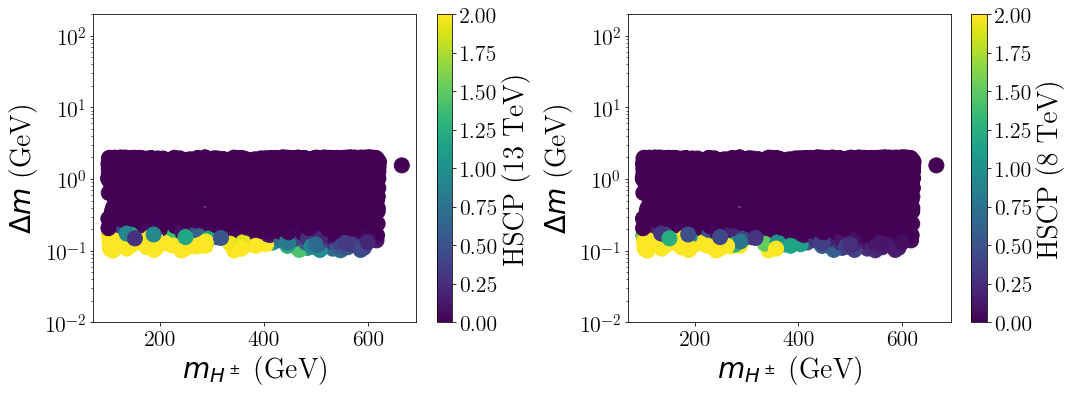

In [11]:
#Sets the order of the curves:
curveIndex = OrderedDict()
curveIndex['HSCP (13 TeV)'] =-3
curveIndex['HSCP (8 TeV)'] = -5
# curveIndex['MET (13 TeV)'] = -2
# curveIndex['MET (8 TeV)'] = -4
xIndex = 0
yIndex = 2
fig = plt.figure()
iplot = 1
nrows = 2
ncolumns = 2
for c,ir in curveIndex.items():
    ax = fig.add_subplot(nrows,ncolumns,iplot)
    iplot += 1
    
    #Get contours using log-ctau
#     excCurve = plotScan.getContour(points[:,0],points[:,3],points[:,ir],
#                         levels=[1.])
    #Convert to ctau:
#     excCurve[1.0][0][:,1] = np.power(10.,excCurve[1.0][0][:,1])
    
    
    plt.yscale('log')
    plt.yscale('log')
    ypoints = points[:,0]-points[:,4]
    ax.scatter(points[:,0],ypoints,c=points[:,ir],vmin=0.,vmax=2.)
#     plt.plot(excCurve[1.0][0][:,0],excCurve[1.0][0][:,1],color='white')    
    PCM = fig.axes[-1].collections[0]
    cbar = fig.colorbar(PCM)
    cbar.set_label(c)
    plt.xlabel(variables[xIndex])    
    plt.ylabel(variables[yIndex])
    plt.ylabel(r'$\Delta m$ (GeV)')
    plt.ylim(0.01,200.)
fig.tight_layout()
# fig.savefig('deltaM.pdf')

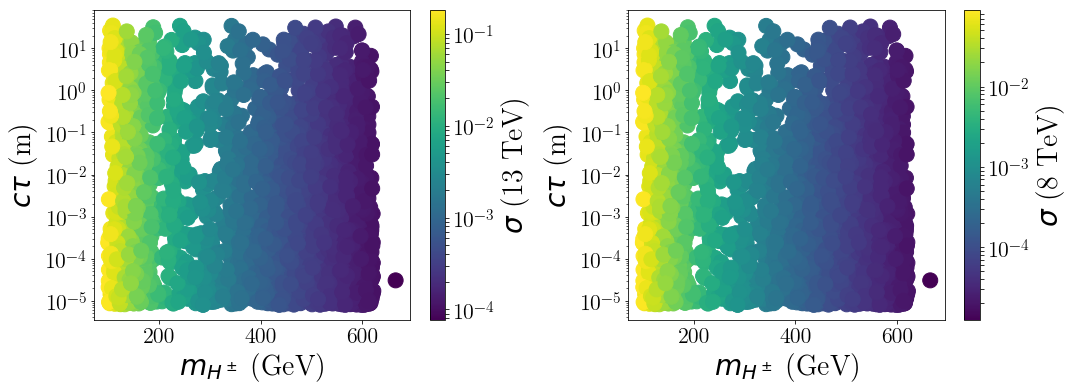

In [37]:
#Sets the order of the curves:
curveIndex = OrderedDict()
curveIndex[r'$\sigma$ (13 TeV)'] = 5
curveIndex[r'$\sigma$ (8 TeV)'] = 6
xIndex = 0
yIndex = 2
fig = plt.figure()
iplot = 1
nrows = 2
ncolumns = 2
for c,ir in curveIndex.items():
    ax = fig.add_subplot(nrows,ncolumns,iplot)
    iplot += 1
   
    plt.yscale('log')
    ax.scatter(points[:,0],points[:,2],c=points[:,ir],norm=LogNorm(vmin=points[:,ir].min(), vmax=points[:,ir].max()))
    PCM = fig.axes[-1].collections[0]
    cbar = fig.colorbar(PCM)
    cbar.set_label(c)
    plt.xlabel(variables[xIndex])
    plt.ylabel(variables[yIndex])
    
fig.tight_layout()

In [39]:
slhaFolder = glob.glob('/home/lessa/DarkMatter-LLP/data/slha/*lepton*slha')
parsExpr = ["blocks['MASS'][5000011]", #0
            "decays[5000011].totalwidth", #1
            "1.968e-16/(max(1e-20,decays[5000011].totalwidth))", #2
           "np.log10(1.968e-16/(max(1e-20,decays[5000011].totalwidth)))", #3
            "blocks['MASS'][5000012]", #4
            "xsections[(2212,2212,-5000011,5000011)].get_xsecs(sqrts=13000.)[0].value", #5
            "xsections[(2212,2212,-5000011,5000011)].get_xsecs(sqrts=8000.)[0].value" #6
           ]
pointsHE,_ = plotScan.getSLHAPoints(parsExpr,slhaFolder)

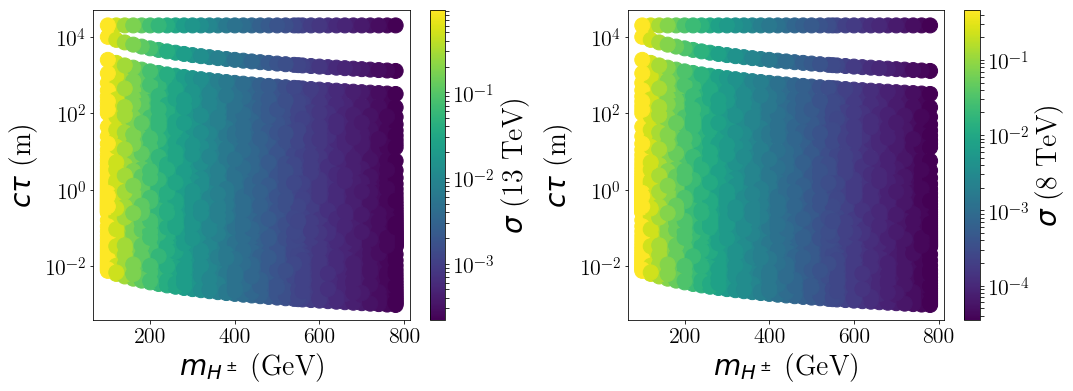

In [40]:
#Sets the order of the curves:
curveIndex = OrderedDict()
curveIndex[r'$\sigma$ (13 TeV)'] = 5
curveIndex[r'$\sigma$ (8 TeV)'] = 6
xIndex = 0
yIndex = 2
fig = plt.figure()
iplot = 1
nrows = 2
ncolumns = 2
for c,ir in curveIndex.items():
    ax = fig.add_subplot(nrows,ncolumns,iplot)
    iplot += 1
   
    plt.yscale('log')
    ax.scatter(pointsHE[:,0],pointsHE[:,2],c=pointsHE[:,ir],norm=LogNorm(vmin=pointsHE[:,ir].min(), vmax=pointsHE[:,ir].max()))
    PCM = fig.axes[-1].collections[0]
    cbar = fig.colorbar(PCM)
    cbar.set_label(c)
    plt.xlabel(variables[xIndex])    
    plt.ylabel(variables[yIndex])
    
fig.tight_layout()

In [10]:
for i,pt in enumerate(points):
    if pt[0]-pt[4] > 100. and pt[7]-pt[4] > 100.:
        print(pt)
        print(slhaFiles[i])
        break